<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-daniela-estevez/blob/main/Actividad_Semanal_6%2C_visualizacio%CC%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 6, visualización

**Nombre 1:** Daniela Estevez Rodriguez

**Matricula 1:** A01793723
<br>
<br>
**Materia:** Ciencia y analítica de datos

**Profesor:** Victoria Guerrero Orozco

**Fecha:** 1 de Noviembre de 2022

In [ ]:
# Para omitir los mensajes de warnings
import warnings

warnings.filterwarnings("ignore")

# Para ayudar a que el código esté mejor estructurado (buenas prácticas)
%load_ext nb_black

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

**Data Set Information:**

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel "Sorting Smoothing Method" to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.
<br><br>
*Attribute Information:*

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br><br>
X2: Gender (1 = male; 2 = female). <br><br>
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). <br><br>
X4: Marital status (1 = married; 2 = single; 3 = others). <br><br>
X5: Age (year). <br><br>
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. <br><br>
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. <br><br>
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

1. Descarga los datos y carga el dataset en tu libreta.

In [ ]:
url = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
data = pd.read_csv(url)

<IPython.core.display.Javascript object>

In [ ]:
# Creamos una copia para mantener los datos originales
df = data.copy()

<IPython.core.display.Javascript object>

2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [ ]:
# Info de los primeros 5 renglones
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


<IPython.core.display.Javascript object>

**Observaciones:**

* Se observan varios 0 en las columnas de monto en recibo y monto pagado. Hay qeu prestarles atención.

In [ ]:
# Tamaño dataframe (df)
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El DataFrame tiene 30000 filas y 25 columnas


<IPython.core.display.Javascript object>

In [ ]:
# obs no nulas y tipo de variable de las columnas del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

<IPython.core.display.Javascript object>

**Comentarios:**

* Todas las variables estan definidas como numéricas.
* Las variables, X2, X4 y X6 a X11 deben ser categóricas.
* La variable X3 debe ser ordinal.
* Observamos que el numero de renglones no nulos es menor que 30,000 para todas las variables excepto ID y X1
* Observamos que adicional a las variables de las descripción esta la variable ID.
* La variable ID no nos aporta información de los datos.

In [ ]:
# Lista de variables no numericas
no_num = ["X2", "X3", "X4", "X6", "X7", "X8", "X9", "X10", "X11", "Y"]

# Cambiamos tipo de variables categoricas
for c in no_num:
    df[c] = df[c].astype("category")

<IPython.core.display.Javascript object>

In [ ]:
# Info sobre tipo de variables
df.dtypes

ID        int64
X1        int64
X2     category
X3     category
X4     category
X5      float64
X6     category
X7     category
X8     category
X9     category
X10    category
X11    category
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17     float64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
Y      category
dtype: object

<IPython.core.display.Javascript object>

**Observaciones:**

* Nos da información similar a df.info().
* Observamos que ya fueron cambiadas al tipo categoria las variables X2, X3, X4, X6, X7, X8, X9, X10,X11, Y

In [ ]:
# Info sobre valores faltantes
df.isna().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

<IPython.core.display.Javascript object>

**Observaciones:**

* Existen varios valores faltantes.
* Solo ID y X1 no tienen valores faltantes.

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna


In [ ]:
# Elimino valores faltantes de variable de respuesta Y
df.dropna(subset=["Y"], axis=0, inplace=True)
# Resetea el index
df.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
# Elimino variable ID
df.drop(columns="ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
# Lista de variables numericas y no numericas
num = [
    "X1",
    "X5",
    "X12",
    "X13",
    "X14",
    "X15",
    "X16",
    "X17",
    "X18",
    "X19",
    "X20",
    "X21",
    "X22",
    "X23",
]
no_num = ["X2", "X3", "X4", "X6", "X7", "X8", "X9", "X10", "X11", "Y"]

<IPython.core.display.Javascript object>

In [ ]:
# Sustituyo faltante por la media
for i in num:
    df[i].replace(np.nan, df[i].median(), inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
# Info sobre valores faltantes
df.isna().sum()

X1      0
X2      1
X3      2
X4      2
X5      0
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
Y       0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
# Sustituyo faltante por la moda
for i in no_num:
    df[i] = df[i].fillna(df[i].mode()[0])

<IPython.core.display.Javascript object>

In [ ]:
# Info sobre valores faltantes
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

<IPython.core.display.Javascript object>

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,29997.0,167496.072274,129748.803871,10000.0,50000.0,140000.0,240000.0,1000000.0
X5,29997.0,35.483615,9.217366,21.0,28.0,34.0,41.0,79.0
X12,29997.0,51228.534837,73637.071379,-165580.0,3566.0,22385.5,67094.0,964511.0
X13,29997.0,49182.573924,71175.530729,-69777.0,2986.0,21205.0,64013.0,983931.0
X14,29997.0,47016.370470,69351.044047,-157264.0,2671.0,20089.0,60167.0,1664089.0
X15,29997.0,43265.961896,64334.451680,-170000.0,2332.0,19052.0,54515.0,891586.0
X16,29997.0,40314.124779,60797.686272,-81334.0,1768.0,18107.0,50180.0,927171.0
X17,29997.0,38876.048538,59555.293718,-339603.0,1257.0,17081.0,49205.0,961664.0
X18,29997.0,5662.352002,16562.848369,0.0,1000.0,2100.0,5006.0,873552.0
X19,29997.0,5921.706137,23041.938698,0.0,836.0,2009.0,5000.0,1684259.0


<IPython.core.display.Javascript object>

**Observaciones:**

* Las variables tienes rango muy distintos, sería aconsejable normalizar los datos.
* Observamos que los rangos intercuantilicos son mucho menores que los rangos para la mayoría de los datos. Esto indica posibles datos outliers.
* Observamos que las variables X12 a X17 tienen valores negativos. Esto puede deberse a que hay saldos negativos (deuda) y saldos positivos (pagaron de más) por parte de los clientes. Como no se tiene acceso a mayor información asumire que la información es correcta.


In [ ]:
df.describe(include="category")

,X2,X3,X4,X6,X7,X8,X9,X10,X11,Y
count,29997.0,29997.0,29997.0,29997.0,29997.0,29997.0,29997.0,29997.0,29997.0,29997.0
unique,2.0,7.0,4.0,11.0,11.0,11.0,11.0,10.0,10.0,2.0
top,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,18112.0,14030.0,15965.0,14738.0,15732.0,15767.0,16457.0,16951.0,16290.0,23362.0


<IPython.core.display.Javascript object>

**Observaciones:**

* Observamos que para X2 la categoría más comun es 2, es decir la mayoria de las observaciones son mujeres.
* Observamos que para X3 la categoría más comun es 2, es decir la mayoria de las observaciones tienen un nivel educativo de universidad.
* Observamos que para X4 la categoría más comun es 2, es decir la mayoria de las observaciones son solteros.
* Observamos que para las varaibles X6 a X11 la categoría más comun es 0.
* Observamos que para Y la categoría más comun es 0, es decir la mayoria de las observaciones no dejaron de pagar.

5. Realiza el conteo de las variables categóricas

In [ ]:
# Conteo variables de historial de pago
for i in no_num:
    print(f"Columna: {i}")
    print(df[i].value_counts())
    print("")

Columna: X2
2.0    18112
1.0    11885
Name: X2, dtype: int64

Columna: X3
2.0    14030
1.0    10584
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64

Columna: X4
2.0    15965
1.0    13655
3.0      323
0.0       54
Name: X4, dtype: int64

Columna: X6
0.0     14738
-1.0     5684
1.0      3688
-2.0     2759
2.0      2665
3.0       322
4.0        76
5.0        26
8.0        19
6.0        11
7.0         9
Name: X6, dtype: int64

Columna: X7
0.0     15732
-1.0     6047
2.0      3925
-2.0     3782
3.0       326
4.0        99
1.0        28
5.0        25
7.0        20
6.0        12
8.0         1
Name: X7, dtype: int64

Columna: X8
0.0     15767
-1.0     5935
-2.0     4085
2.0      3817
3.0       240
4.0        76
7.0        27
6.0        23
5.0        21
1.0         4
8.0         2
Name: X8, dtype: int64

Columna: X9
0.0     16457
-1.0     5685
-2.0     4348
2.0      3156
3.0       180
4.0        69
7.0        58
5.0        35
6.0         5
1.0         2
8

<IPython.core.display.Javascript object>

**Observaciones:**

* Observamos que X2 tiene 2 niveles de categoría de los 2 posibles.
* Observamos que X3 tiene niveles de categoría del 0 al 6, cuando deben ser del 1 al 4. Como no se tiene acceso a verificación de la información procederemos a reemplazar los 0, 5 y 6 por la media.
* Observamos que X4 tiene niveles de categoría del 0 al 3, cuando deben ser del 1 al 3. Como no se tiene acceso a verificación de la información procederemos a reemplazar los 0 por la media.
* Observamos que las varaibles X6 a X11 tienen 11 categorías diferentes son de -2 a 8 cuando solo deben de haber -1 a 9 sin 0. Como no se tiene acceso a verificación de la información procederemos a reemplazar los 0 y -2 por la moda.
* Observamos que Y tiene 2 niveles de categoría de los  2 posibles.

In [ ]:
# Convierte 0 a valor faltante
df["X3"] = df["X3"].replace(0, np.nan)
# Convierte 5 a valor faltante
df["X3"] = df["X3"].replace(5, np.nan)
# Convierte 6 a valor faltante
df["X3"] = df["X3"].replace(6, np.nan)

# Sustituyo faltante por la moda
df["X3"] = df["X3"].fillna(df["X3"].mode()[0])

# Confirmamos cambio
print("Columna: X3")
print(df["X3"].value_counts())
print("")

Columna: X3
2.0    14375
1.0    10584
3.0     4915
4.0      123
Name: X3, dtype: int64



<IPython.core.display.Javascript object>

In [ ]:
# Convierte 0 a valor faltante
df["X4"] = df["X4"].replace(0, np.nan)

# Sustituyo faltante por la moda
df["X4"] = df["X4"].fillna(df["X4"].mode()[0])

# Confirmamos cambio
print("Columna: X4")
print(df["X4"].value_counts())
print("")

Columna: X4
2.0    16019
1.0    13655
3.0      323
Name: X4, dtype: int64



<IPython.core.display.Javascript object>

In [ ]:
for c in df.iloc[:, 5:11].columns:

    # Convierte -2 a valor faltante
    df[c] = df[c].replace(-2, np.nan)
    # Convierte 0 a valor faltante
    df[c] = df[c].replace(0, np.nan)

    # Sustituyo faltante por la moda
    df[c] = df[c].fillna(df[c].mode()[0])

    # Confirmamos cambio
    print(f"Columna: {c}")
    print(df[c].value_counts())
    print("")

Columna: X6
-1.0    23181
1.0      3688
2.0      2665
3.0       322
4.0        76
5.0        26
8.0        19
6.0        11
7.0         9
Name: X6, dtype: int64

Columna: X7
-1.0    25561
2.0      3925
3.0       326
4.0        99
1.0        28
5.0        25
7.0        20
6.0        12
8.0         1
Name: X7, dtype: int64

Columna: X8
-1.0    25787
2.0      3817
3.0       240
4.0        76
7.0        27
6.0        23
5.0        21
1.0         4
8.0         2
Name: X8, dtype: int64

Columna: X9
-1.0    26490
2.0      3156
3.0       180
4.0        69
7.0        58
5.0        35
6.0         5
1.0         2
8.0         2
Name: X9, dtype: int64

Columna: X10
-1.0    27032
2.0      2623
3.0       178
4.0        84
7.0        58
5.0        17
6.0         4
8.0         1
Name: X10, dtype: int64

Columna: X11
-1.0    26920
2.0      2764
3.0       184
4.0        49
7.0        46
6.0        19
5.0        13
8.0         2
Name: X11, dtype: int64



<IPython.core.display.Javascript object>

**Observaciones:**

* Observamos que las varaibles X3, X4 y X6 a X11 ya tienen los niveles de categoría adecuados.

6. Escala los datos, si consideras necesario

In [ ]:
# Creamos una copia
df_c = df.copy()
df = df_c.copy()

<IPython.core.display.Javascript object>

In [ ]:
# Deja unicamente las variables no categórias
df_num = df[num]

<IPython.core.display.Javascript object>

In [ ]:
# Normaliza los datos
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_num))
df_num.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.136801,-1.245888,-0.642561,-0.647432,-0.668024,-0.672527,-0.663098,-0.652783,-0.341876,-0.227099,-0.296765,-0.308069,-0.314126,-0.293397
1,-0.366068,-1.028903,-0.659279,-0.666779,-0.639285,-0.621667,-0.606269,-0.598026,-0.341876,-0.213601,-0.239968,-0.244239,-0.314126,-0.180899
2,-0.597288,-0.160961,-0.298625,-0.493936,-0.482443,-0.449766,-0.417229,-0.391694,-0.250224,-0.191901,-0.239968,-0.244239,-0.248675,-0.012151
3,-0.905581,0.164517,-0.057561,-0.013342,0.032799,-0.232414,-0.186772,-0.156648,-0.221122,-0.169377,-0.228609,-0.237856,-0.244159,-0.237148
4,-0.905581,2.334370,-0.578679,-0.611352,-0.161231,-0.347035,-0.348179,-0.331547,-0.221122,1.334949,0.271200,0.266405,-0.269030,-0.255204


<IPython.core.display.Javascript object>

7. Reduce las dimensiones con PCA, si consideras necesario.
    
    a) Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
    
    b) Indica la importancia de las variables en cada componente

In [ ]:
# Creación de los componentes principales
pca_std = PCA()
pca_std.fit_transform(df_num)

array([[-1.95859496e+00, -5.36572696e-01,  1.33005848e+00, ...,
        -3.21729121e-03,  8.13196675e-03,  9.87819404e-03],
       [-1.73541870e+00, -2.17001381e-01,  8.63643881e-01, ...,
         1.22171310e-02, -4.08545284e-03,  7.28113282e-04],
       [-1.22435174e+00, -2.84752356e-01,  2.13100550e-01, ...,
        -8.04879978e-02, -4.12256484e-02, -5.72215569e-02],
       ...,
       [-1.28494634e+00,  1.46793821e-01,  2.50631564e-01, ...,
         3.47344762e-02,  1.29997016e-02, -1.21118327e-02],
       [ 8.31716830e-01,  2.42154155e+00,  3.64933348e-01, ...,
         1.70860022e-01, -1.40372223e-01, -8.48723163e-03],
       [-5.16928148e-01, -6.00705709e-01, -7.49504503e-01, ...,
        -1.76396050e-02,  1.15560265e-01, -4.68369056e-02]])

<IPython.core.display.Javascript object>

In [ ]:
# Resumen de varianza de los componentes principales

pcsSummary_df_std = pd.DataFrame(
    {
        "Desviación estándar": np.sqrt(pca_std.explained_variance_),
        "% de la varianza explicada": pca_std.explained_variance_ratio_ * 100,
        "% Varianza acumulada": np.cumsum(pca_std.explained_variance_ratio_) * 100,
    }
)

pcsSummary_df_std = pcsSummary_df_std.transpose()
pcsSummary_df_std.columns = [
    "PC{}".format(i) for i in range(1, len(pcsSummary_df_std.columns) + 1)
]
pcsSummary_df_std.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.4330,1.3100,1.0223,0.9617,0.9400,0.9342,0.8829,0.8524,0.8410,0.5142,0.2665,0.2027,0.1592,0.1525
% de la varianza explicada,42.2796,12.2579,7.4654,6.6065,6.3116,6.2333,5.5681,5.1899,5.0513,1.8887,0.5073,0.2934,0.1811,0.1660
% Varianza acumulada,42.2796,54.5375,62.0029,68.6094,74.9210,81.1543,86.7224,91.9122,96.9635,98.8522,99.3595,99.6529,99.8340,100.0000


<IPython.core.display.Javascript object>

**Observaciones:**

* Observamos que los primeros 5 componentes explican más del 70% de la variabilidad de los datos.
* Pasando de 14 variables a 5 mantenemos más del 70% de la variabilidad de los datosl

In [ ]:
# Explicación de como se compone cada uno de los componentes principales
pcsComponents_df = pd.DataFrame(
    pca_std.components_.transpose(), columns=pcsSummary_df_std.columns, index=num
)
pcsComponents_df.iloc[:, :8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
X1,0.165472,0.300827,-0.378774,-0.200211,0.034724,-0.078227,0.110938,-0.048128
X5,0.032726,0.071944,-0.869562,0.338351,-0.038982,0.071348,-0.078637,0.028098
X12,0.372424,-0.190855,-0.034303,-0.063977,0.041154,-0.044069,0.008159,0.009438
X13,0.383243,-0.174656,-0.001880,0.007383,0.083061,-0.029007,-0.032345,-0.135670
X14,0.388254,-0.126926,0.034702,0.060461,0.114156,0.098803,-0.121318,0.092864
X15,0.391549,-0.120429,0.034006,0.074801,0.028584,0.014393,0.126417,0.039196
X16,0.388495,-0.105961,0.033835,0.039653,-0.106927,-0.099036,-0.007575,0.049706
X17,0.380659,-0.094248,0.018540,-0.070283,-0.164903,0.069734,0.007982,0.000045
X18,0.135181,0.383262,0.173483,0.361364,0.226143,0.039918,-0.201117,-0.749030
X19,0.116804,0.408283,0.200819,0.346318,0.150500,0.407289,-0.279627,0.577988


<IPython.core.display.Javascript object>

**Observaciones:**

* La tabla muestra como se componenen los componentes principales, PC.
* A continuación mostramos un heatmap para entender mejor los números.

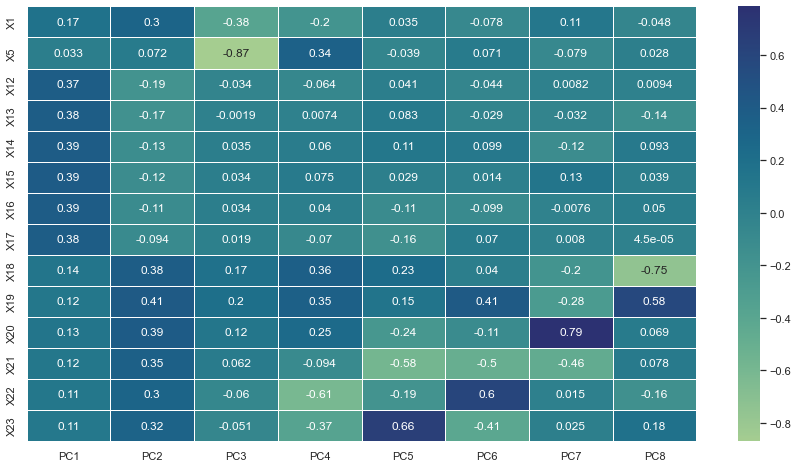

<IPython.core.display.Javascript object>

In [ ]:
sns.set(rc={"figure.figsize": (15, 8)})
sns.heatmap(pcsComponents_df.iloc[:, :8], annot=True, cmap="crest", linewidth=0.5)
plt.show()

**Observaciones:**

* PC1 se compone prinicpalmente de las variables X12 a X17, que son las variables que muestran los montos mensuales de estados de cuenta.
* PC2 se compone prinicpalmente de las variables X1 y X18 a X23, que son las variables que muestran el monto total del crédito y los montos mensuales de pago.
* PC3 se compone prinicpalmente de la variable X5, que es la edad.
* PC4 se compone prinicpalmente de las variables X5 y X18 a X20, que son las varaibles de edad, monto de pago septiembre 2005 y monto de pago julio 2005.
* PC5 se compone prinicpalmente de las variables X23 y X21, que es monto de pago abril 2005 y monto de pago junio 2005.


En resumen el primer componente principal resume los montos en estados de cuenta. El segundo componente la información del prestamo y los pago mensuales. El tercer componente la info de edad y los componente cuatro y cinco información de los pagos.

8. Elabora los histogramas de los atributos para visualizar su distribución

**Variables numéricas**

In [ ]:
# Función de histograma para datos numéricos
def histgrama_num(data, variable, figsize=(12, 7), kde=False, bins=None):
    """
    Función para hacer un histograma

    data: dataframe
    variable: nombre de columna o variable
    figsize: tamaño de figura (default (12,7))
    kde: muestra o no la función de densidad (default False)
    bins: numero de bins para el histograma (default None)
    """

    # Configura tamaño
    sns.set(rc={"figure.figsize": figsize})

    sns.histplot(
        data=data, x=variable, kde=kde, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=variable, kde=kde)

    # Agrega la mediana
    plt.axvline(data[variable].mean(), color="green", linestyle="--")
    # Agrega la media
    plt.axvline(data[variable].median(), color="black", linestyle="-")

    # Configura titulos y nombre de axes
    plt.ylabel("Cuenta")
    plt.xlabel("")
    plt.title(f"Histograma de variable: {variable}")

    plt.show()

<IPython.core.display.Javascript object>

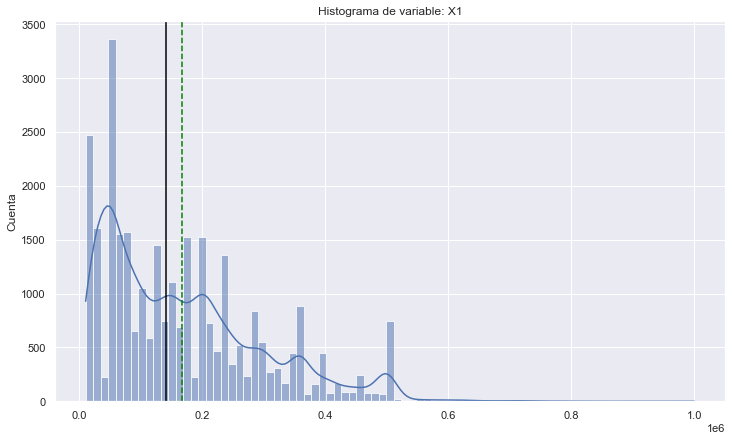

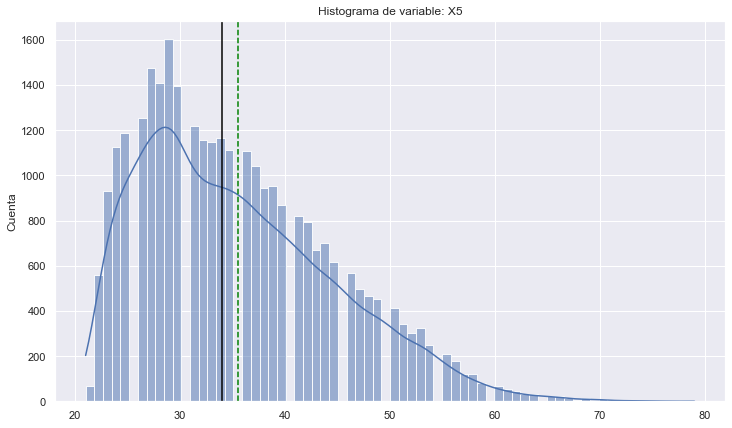

<IPython.core.display.Javascript object>

In [ ]:
# Histogramas
for i in num[0:2]:
    histgrama_num(data=df, variable=i, kde=True)

**Observaciones:**

* Observamos que X1 tiene sesgo a la izquierda. Los valores se consentran en menos de 500,000 pero el máximo esta por 1,000,000.

* Observamos que para todas las variables entre X5 tiene sesgo a la izquierda. La media y mediana estan cercanas, alrededor de 35.


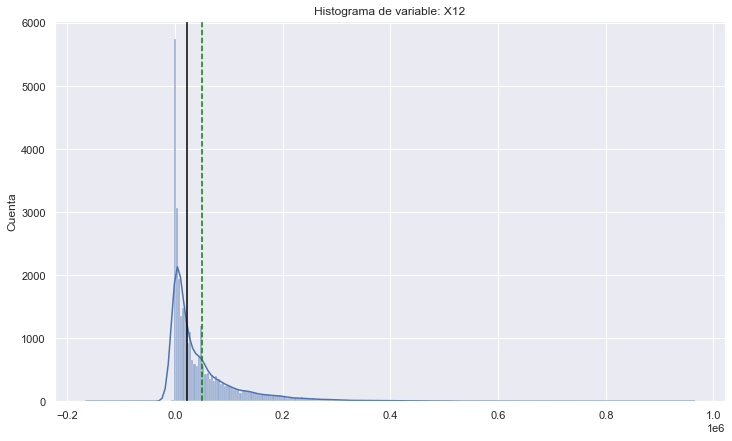

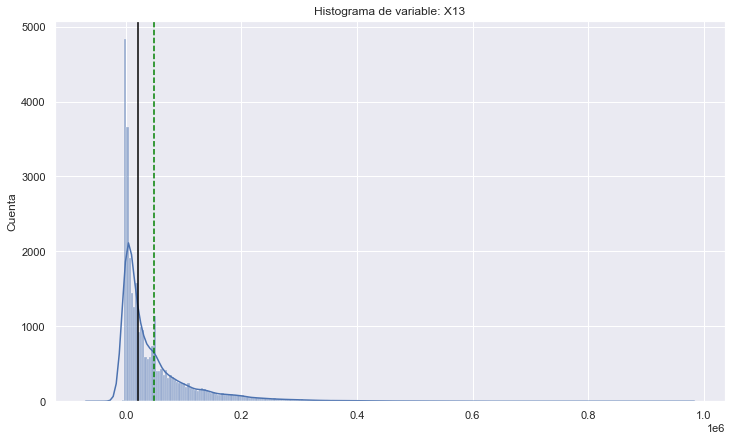

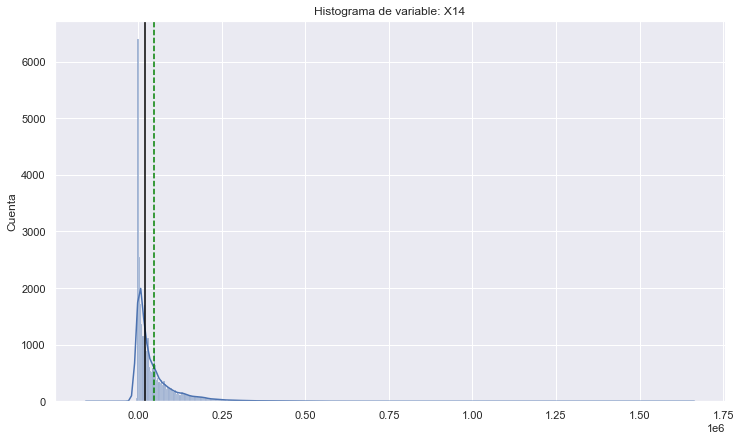

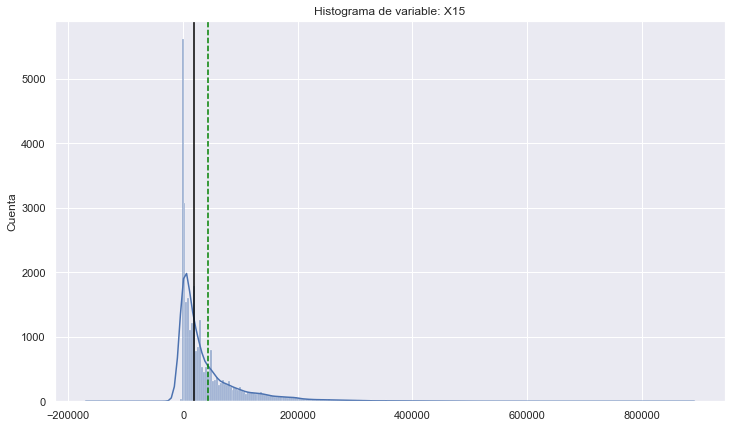

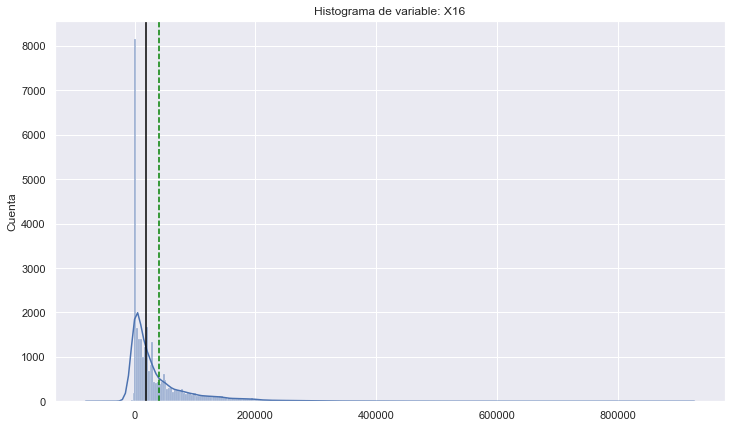

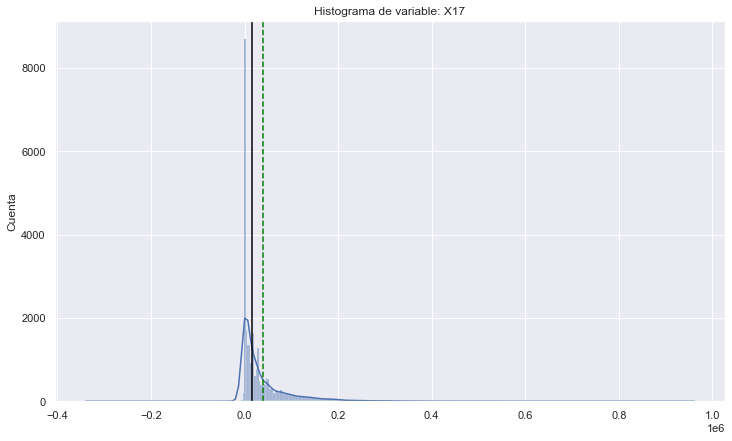

<IPython.core.display.Javascript object>

In [ ]:
# Histogramas
for i in num[2:8]:
    histgrama_num(data=df, variable=i, kde=True)

**Observaciones:**

* Observamos que para todas las variables entre X12 y X17, los datos se consentran en cero, sin embargo hay algunos outliers. Las distribuciones estan sesgadas a la izquierda con colas muy largas.

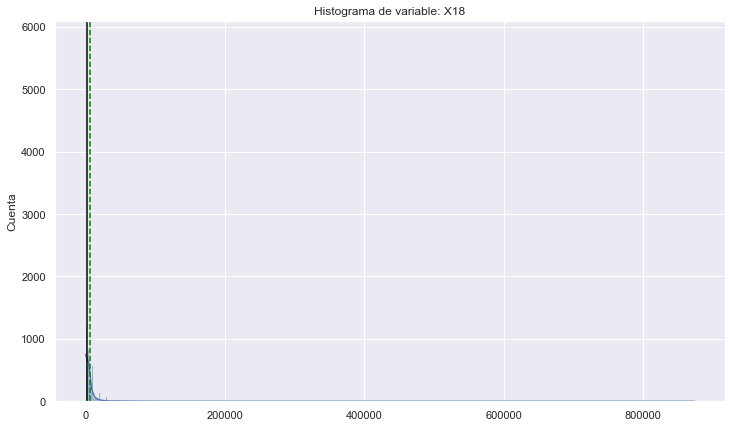

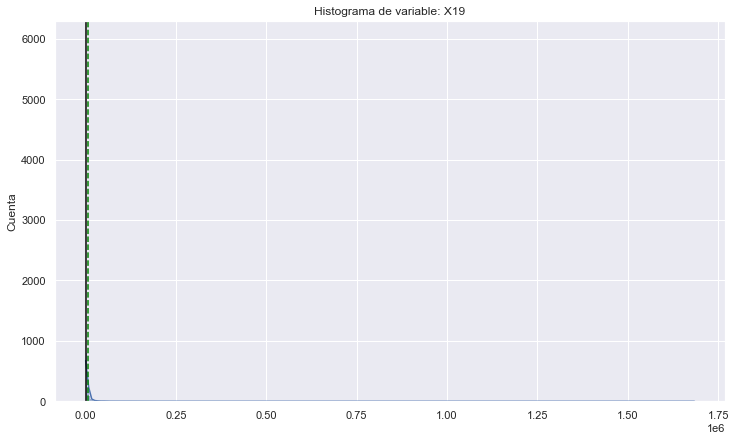

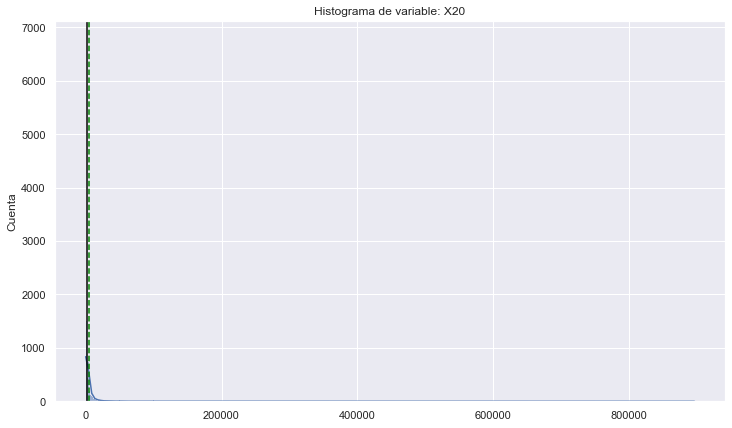

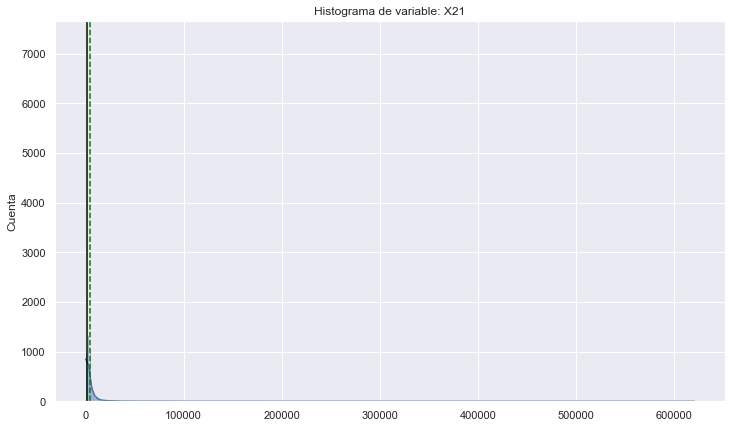

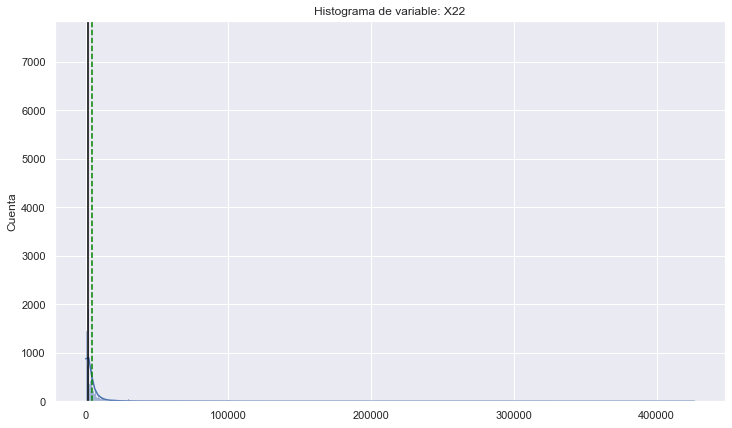

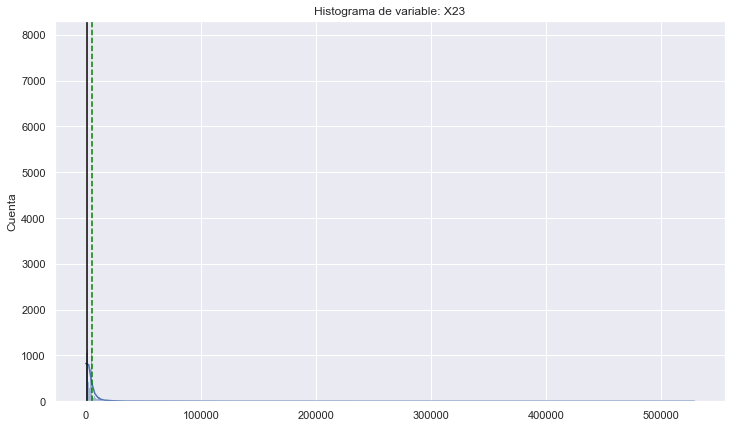

<IPython.core.display.Javascript object>

In [ ]:
# Histogramas
for i in num[8:]:
    histgrama_num(data=df, variable=i, kde=True)

**Observaciones:**

* Observamos que para todas las variables entre X18 y X23, los datos se consentran en cero, sin embargo hay algunos outliers. Las distribuciones estan extremadamente sesgadas a la izquierda con colas muy largas.

**Variables no numéricas**

In [ ]:
# función para crear barplot con etiquetas
def grafico_barras(data, variable, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    variable: nombre de columna o variable
    perc: muestra los porcentajes en vez de la cuenta (default es False)
    n: muestra el top n de los niveles de categorias (default es None, es decir, muestra todos los nivels)
    """

    total = len(data[variable])  # tamaño de la columna
    count = data[variable].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=variable,
        palette="Paired",
        order=data[variable].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # porcentaje de cada categoría
        else:
            label = p.get_height()  # cuenta de cada nivel de la categoría

        x = p.get_x() + p.get_width() / 2  # ancho de la gráfica
        y = p.get_height()  # altura de la gráfica

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # muestra los porcentajes

    plt.ylabel("Cuenta")
    plt.xlabel("")
    plt.title(f"Gráfico de barras de variable {i}")

    plt.show()

<IPython.core.display.Javascript object>

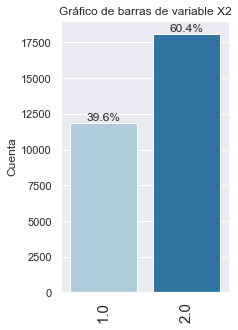

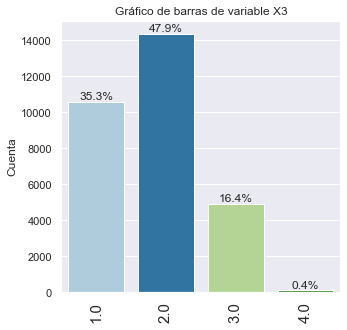

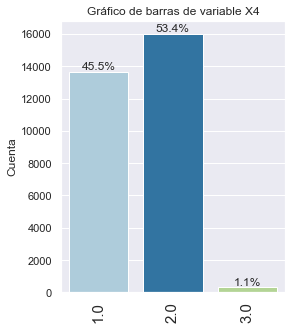

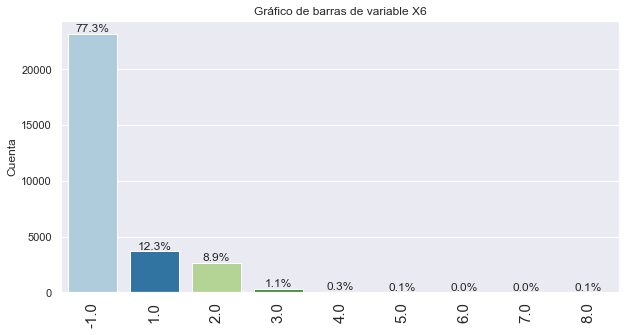

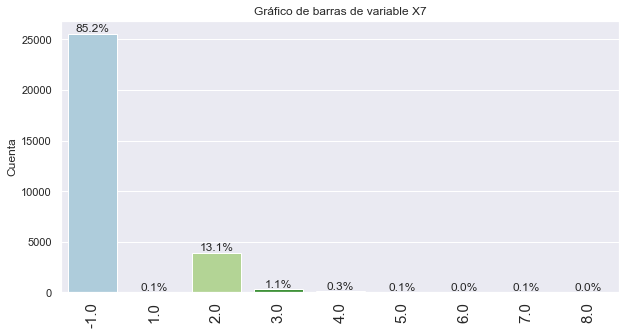

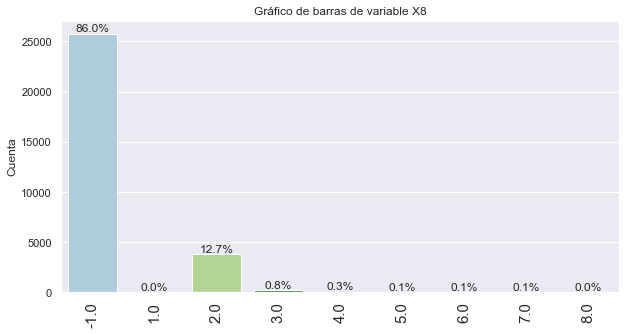

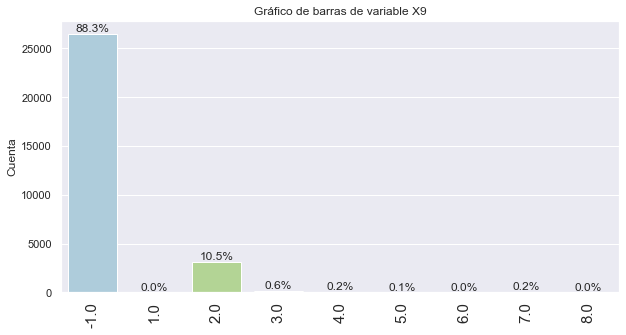

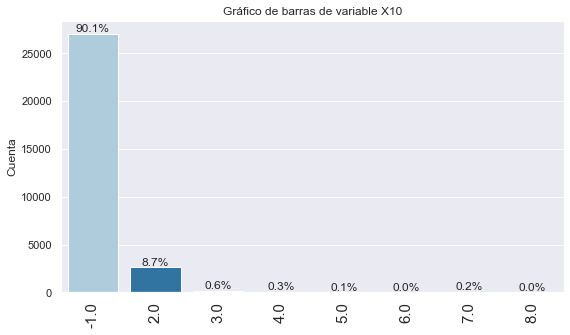

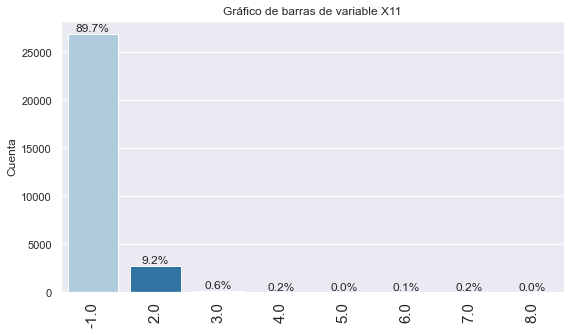

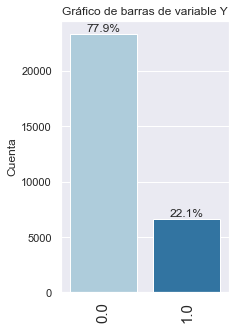

<IPython.core.display.Javascript object>

In [ ]:
for i in no_num:
    grafico_barras(data=df, variable=i, perc=True)

**Observaciones:**

* Para la variable X2 el 60% de las observaciones es 2.
* Para la variable X3 el top de observaciones tiene 2, luego 1 y en tercer lugar 3.
* Para la variable X4 el top de observaciones tiene 2 y 1. 
* Para la variable X6 a X11 el top de observaciones tiene 0.
* Para la variable Y el top de observaciones tiene 0.

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

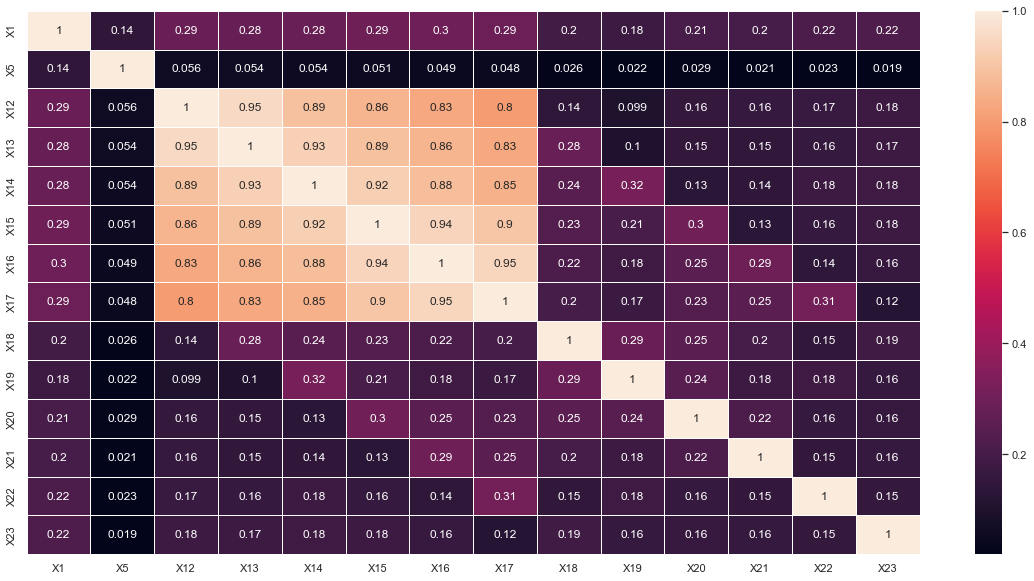

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5)

**Observaciones:**

* El correlograma nos indica las correlaciones entre las variables.
* Notamos que las variables más correlacionadas son las variables X12 a X17.
* El resto de las variables no tienen correlaciones muy altas.

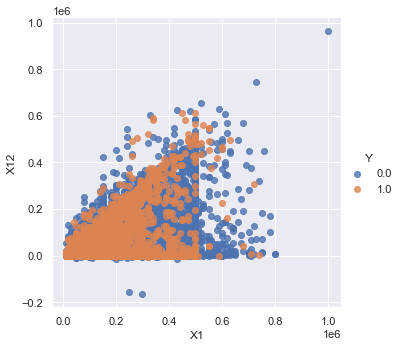

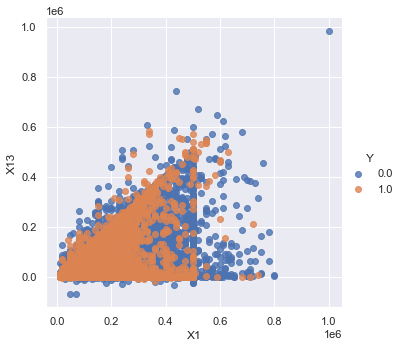

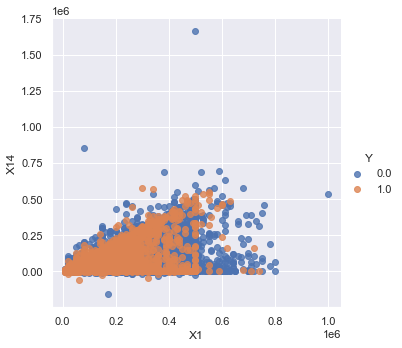

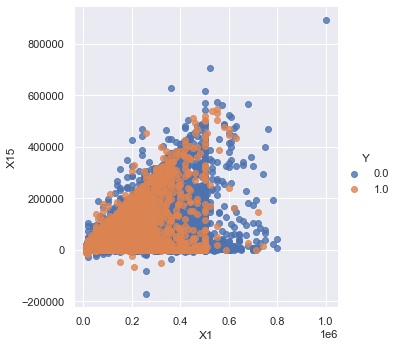

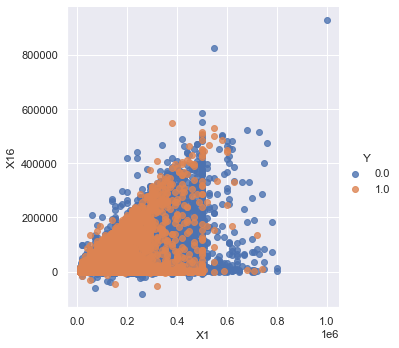

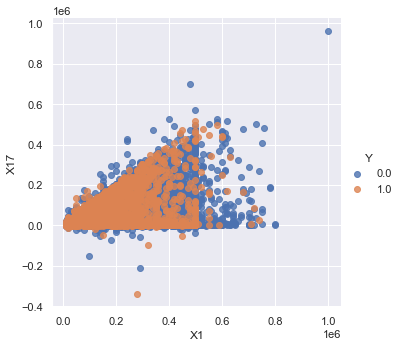

<IPython.core.display.Javascript object>

In [ ]:
for i in df.iloc[:, 11:17].columns:
    sns.lmplot(x="X1", y=i, data=df, fit_reg=False, hue="Y")
    plt.show()

**Observaciones:**

* Se realizó un gráfico de regresión entre la variable X1 y las variables X12 a X17 considerando una diferenciación de la variable Y.
* Observamos que existe una relación lineal positiva entre la variable X1 y las variables X12 a X17.
* A pesar de que no se aprecia mucha diferencia por la variables Y,en general las observaciones con Y=1 (deudoras) tiene estan más cerca del 0 de X1.

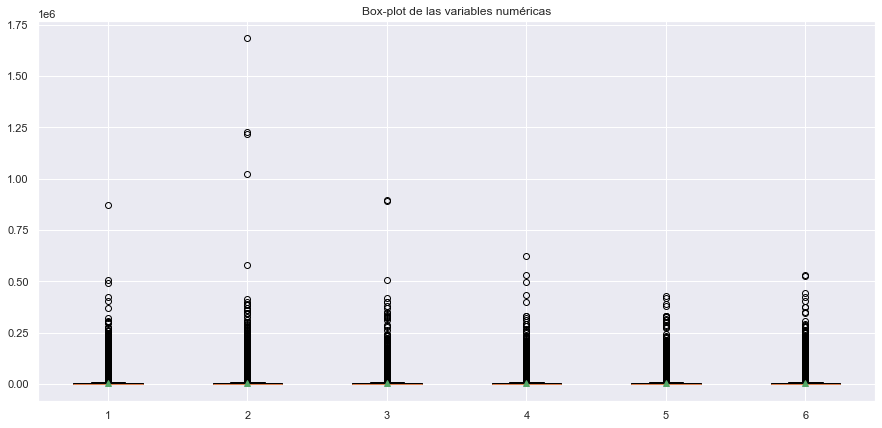

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 7))
plt.boxplot(df[["X18", "X19", "X20", "X21", "X22", "X23"]], showmeans=True)
plt.title("Box-plot de las variables numéricas")
plt.show()

**Observaciones:**

* Se realizó un boxplot de todas las variables X18 a X23.
* X18 a X23 son los montos de pago.
* Notamos la distribución de los montos de pago son similares, las observaciones se agrupan en unos pocos miles y hay varios outliers. 



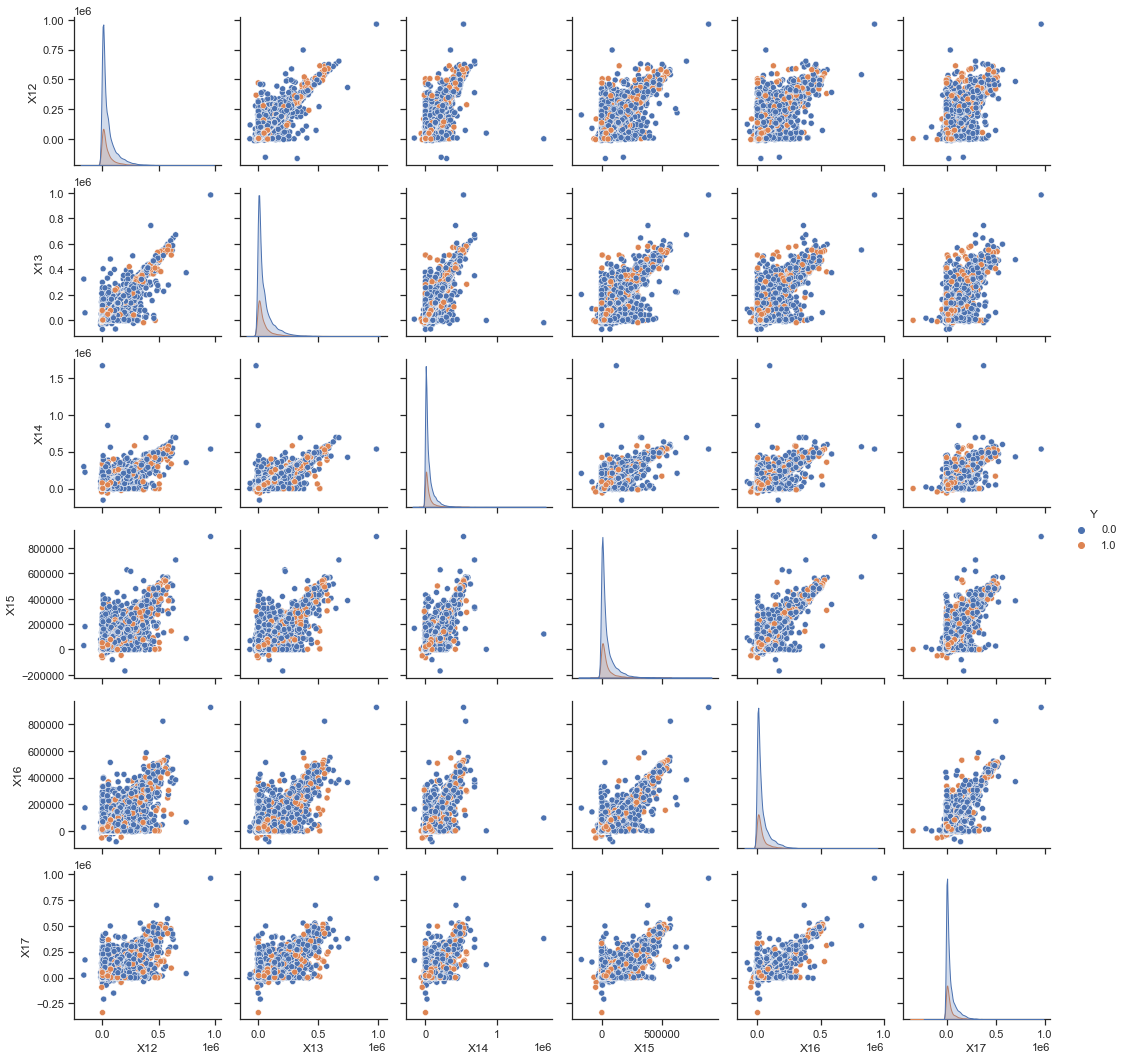

<IPython.core.display.Javascript object>

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df, vars=["X12", "X13", "X14", "X15", "X16", "X17"], hue="Y")

**Observaciones:**

* Se realizó un gráfico de disperción entre la variable X1 y las variables X12 a X17 considerando una diferenciación de la variable Y.
* Observamos que existe una relación lineal positiva entre la variable X1 y las variables X12 a X17.
* No se aprecia mucha diferencia en la disperción de las obs de Y=0 y Y=1.

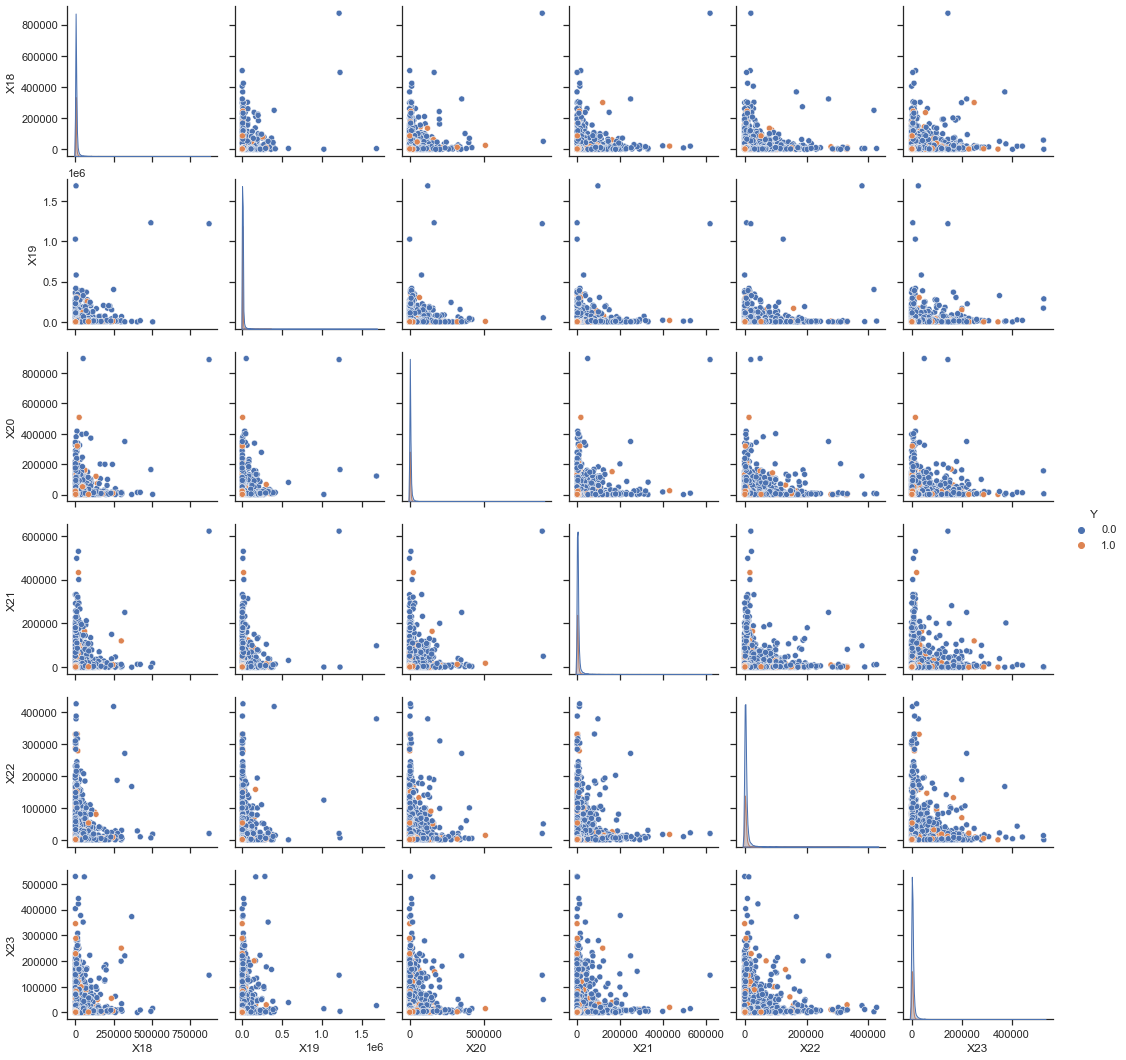

<IPython.core.display.Javascript object>

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df, vars=["X18", "X19", "X20", "X21", "X22", "X23"], hue="Y")

**Observaciones:**

* Se realizó un gráfico de disperción entre la variable X1 y las variables X18 a X23 considerando una diferenciación de la variable Y.
* Observamos que no existe una relación lineal entre la variable X1 y las variables X18 a X23.
* No se aprecia mucha diferencia en la disperción de las obs de Y=0 y Y=1.

10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

El gráfico más relevante siempre va a variar dependiendo de las necesidades del usuario. Es decir, la información más relevante va a depender de lo que se quiere lograr.

En el punto anterior, decidi realizar un correlograma, gráficos de regresión, boxplot y gráficos de disperción. A continuación, dejo algunas observaciones de los gráficos.

CORRELOGRAMA
* El correlograma nos indica las correlaciones entre las variables.
* Notamos que las variables más correlacionadas son las variables X12 a X17.
* El resto de las variables no tienen correlaciones muy altas.

GRÁFICOS DE REGRESIÓN
* Se realizó un gráfico de regresión entre la variable X1 y las variables X12 a X17 considerando una diferenciación de la variable Y.
* Observamos que existe una relación lineal positiva entre la variable X1 y las variables X12 a X17.
* A pesar de que no se aprecia mucha diferencia por la variables Y,en general las observaciones con Y=1 (deudoras) tiene estan más cerca del 0 de X1.

BOXPLOT
* Se realizó un boxplot de todas las variables X18 a X23.
* X18 a X23 son los montos de pago.
* Notamos la distribución de los montos de pago son similares, las observaciones se agrupan en unos pocos miles y hay varios outliers. 

GRÁFICOS DE DISPERCIÓN
* Se realizó un gráfico de disperción entre la variable X1 y las variables X12 a X17 considerando una diferenciación de la variable Y.
* Observamos que existe una relación lineal positiva entre la variable X1 y las variables X12 a X17.
* No se aprecia mucha diferencia en la disperción de las obs de Y=0 y Y=1.
<br>
* Se realizó un gráfico de disperción entre la variable X1 y las variables X18 a X23 considerando una diferenciación de la variable Y.
* Observamos que no existe una relación lineal entre la variable X1 y las variables X18 a X23.
* No se aprecia mucha diferencia en la disperción de las obs de Y=0 y Y=1.

De los gráficos podemos resumir la información más relevante como sigue:

     -> Las variables más correlacionadas son las variables X12 a X17.
     -> Existe una relación lineal positiva entre la variable X1 y las variables X12 a X17.
     -> No existe una relación lineal positiva entre la variable X1 y las variables X18 a X23.
     -> Para las variables X12 a X17 contra la variable X1 las observaciones con Y=1 (deudoras) tienden a estar más cerca del 0 de X1.
     -> La distribución de las variables X18 a X23 (montos de pago) son similares, las observaciones se agrupan en unos pocos miles y hay varios outliers. 